In [70]:
import pandas as pd
import os
import sys
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

sys.path.insert(0, '/home/hojaechoi/work/qsar-pytorch')
from deargen_qsar.analysis.plot_graphs import add_abline

In [53]:
out_dir = '../outputs/Completed'
model_run_dict = {'GNN-MAML': 'FSMol_Eval_MAML_2023-05-10_01-33-24',
                  'GNN-MT': 'FSMol_Eval_Multitask_2023-05-07_23-35-51',
                  'MAT': 'FSMol_Eval_MAT_2023-05-10_06-59-28',
                  'RF': 'FSMol_Eval_randomForest_2023-05-10_00-36-43',
}

In [ ]:

model_task_predlabelfile_dict = {}
model_task_evalresultfile_dict = {}
for model, run in model_run_dict.items():
    run_dir = os.path.join(out_dir, run)

    task_predlabel_csvfiles_dict = {file.split('_')[0]: os.path.join(run_dir, file) for file in os.listdir(run_dir) if 'pred_label' in file }
    task_evalresults_csvfiles_dict = {file.split('_')[0]:  os.path.join(run_dir, file) for file in os.listdir(run_dir) if 'eval_results' in file }
    
    model_task_predlabelfile_dict[model] = task_predlabel_csvfiles_dict
    model_task_evalresultfile_dict[model] = task_evalresults_csvfiles_dict

In [143]:

model_metric_dict = {}
for model, task_evalresults_csvfiles_dict in model_task_evalresultfile_dict.items():
    if len(task_evalresults_csvfiles_dict) == 0:
        continue
    metric_df = pd.concat({task: pd.read_csv(file) for task, file in task_evalresults_csvfiles_dict.items()}).droplevel(1).rename_axis('task')
    model_metric_dict[model] = metric_df.reset_index()
model_metric_df = pd.concat(model_metric_dict).droplevel(1).rename_axis('model').reset_index()

In [142]:

model_predlabel_dict = {}
for model, task_predlabel_csvfiles_dict in model_task_predlabelfile_dict.items():
    if len(task_predlabel_csvfiles_dict) == 0:
        continue
    predlabel_df = pd.concat({task: pd.read_csv(file) for task, file in task_predlabel_csvfiles_dict.items()}).droplevel(1).rename_axis('task')
    model_predlabel_dict[model] = predlabel_df.reset_index()
model_predlabel_df = pd.concat(model_predlabel_dict).droplevel(1).rename_axis('model').reset_index()

In [37]:

model_metric_df#.groupby(['num_train_requested', 'num_train', 'seed'])

,model,task,num_train_requested,num_train,fraction_positive_train,num_test,fraction_positive_test,seed,valid_score,mean_absolute_error,root_mean_squared_error,max_error,pearson_corr,concordance_index,spearman_corr,r_squared,kendall_tau
0,MAML,CHEMBL2219340,16,16,0.500000,141,0.489362,0,NaN,41.559753,44.971460,79.78618,-0.109231,0.455399,-0.134687,-0.438787,-0.089202
1,MAML,CHEMBL2219340,16,16,0.500000,141,0.489362,1,NaN,37.930530,43.428740,102.31713,-0.179298,0.436964,-0.184500,-0.327300,-0.126072
2,MAML,CHEMBL2219340,16,16,0.500000,141,0.489362,2,NaN,37.394737,43.782784,104.91906,-0.183372,0.429554,-0.209852,-0.334123,-0.140891
3,MAML,CHEMBL2219340,16,16,0.500000,141,0.489362,3,NaN,44.634865,47.847420,82.47366,-0.115685,0.453884,-0.138715,-0.617960,-0.092233
4,MAML,CHEMBL2219340,16,16,0.500000,141,0.489362,4,NaN,41.117786,44.792347,83.94747,-0.142808,0.448528,-0.151963,-0.411776,-0.102943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20125,RF,CHEMBL2219335,128,128,0.476562,29,0.482759,5,NaN,9.705517,11.638698,23.34000,0.149079,0.504963,0.011585,-0.248972,0.009926
20126,RF,CHEMBL2219335,128,128,0.476562,29,0.482759,6,NaN,10.634483,12.558586,28.95000,0.175131,0.568497,0.189419,-0.218118,0.136995
20127,RF,CHEMBL2219335,128,128,0.476562,29,0.482759,7,NaN,14.576552,21.719574,89.70000,0.088567,0.522389,0.049069,-0.021603,0.044778
20128,RF,CHEMBL2219335,128,128,0.476562,29,0.482759,8,NaN,13.941724,20.273752,58.81000,0.530791,0.529778,0.084545,0.247715,0.059555


In [56]:
model_metric_df.groupby(['model','num_train', 
                        #  'seed',
                         ])[['mean_absolute_error',
                                      'root_mean_squared_error',
                                      'max_error',
                                      'pearson_corr',
                                      'concordance_index',
                                        'spearman_corr',
                                        'r_squared',
                                        'kendall_tau']].describe()

mean_absolute_error                               \
                                 count           mean           std   
model    num_train                                                    
GNN-MAML 16                     1570.0  114531.490101  1.350414e+06   
         32                     1570.0  113818.363271  1.397830e+06   
         64                     1570.0  108929.291351  1.461045e+06   
         128                    1570.0  186505.068378  2.964578e+06   
         256                     430.0   12495.266847  1.525109e+04   
GNN-MT   16                     1570.0  116020.151128  1.363117e+06   
         32                     1570.0  115606.811197  1.410702e+06   
         64                     1570.0  111452.361273  1.481224e+06   
         128                    1570.0  189395.438623  2.979126e+06   
         256                     430.0   12276.760476  1.787158e+04   
MAT      16                     1570.0  114566.155891  1.350413e+06   
         32                     1570.0  113855.986290  1.397829e+06   
         64                     1570.0  108969.069830  1.461044e+06   
         128                    1570.0  186546.180101  2.964576e+06   
         256                     430.0   12550.774432  1.525322e+04   
RF       16                     1570.0  131571.647106  1.611782e+06   
         32                     1570.0  144300.468215  1.743225e+06   
         64                     1570.0  164648.367383  1.998652e+06   
         128                    1570.0  243016.917336  3.287110e+06   
         256                     430.0   10004.702410  1.547731e+04   

                                                                        \
                           min          25%          50%           75%   
model    num_train                                                       
GNN-MAML 16          17.218857    27.654760   386.900390   6944.681575   
         32          16.992035    27.292652   387.695585   7008.374250   
         64          16.820639    26.371269   379.073855   6991.900625   
         128         13.112130    26.048092   334.901165   7146.406125   
         256        127.649250  4514.795500  6182.390200  14546.952250   
GNN-MT   16          12.236239   206.102930  1295.088511   9279.026484   
         32          12.155906   219.370628  1333.352479   9283.297898   
         64          12.089992   207.155216  1251.658686   9440.963332   
         128         10.117238   201.033852  1374.228842   9693.961763   
         256        176.090215  3132.409594  6044.326455  13615.652567   
MAT      16          25.511459    51.474292   421.138340   6992.545993   
         32          25.507938    51.410815   423.165213   7061.515923   
         64          25.177350    51.294794   412.053598   7044.713641   
         128         23.616957    51.226905   360.299145   7212.233639   
         256        149.441982  4588.453040  6229.898567  14603.019287   
RF       16           7.519858    17.860106   357.259937   6039.658926   
         32           7.273840    17.207365   344.822919   6012.696886   
         64           7.003441    16.889140   340.607826   5896.086513   
         128          5.576552    16.133276   308.185889   5828.303117   
         256        151.960109  2207.800691  5324.436193  11122.657480   

                                 root_mean_squared_error                ...  \
                             max                   count          mean  ...   
model    num_train                                                      ...   
GNN-MAML 16         1.763593e+07                  1570.0  9.406466e+05  ...   
         32         1.970254e+07                  1570.0  9.034887e+05  ...   
         64         2.483605e+07                  1570.0  7.968821e+05  ...   
         128        6.375420e+07                  1570.0  9.779942e+05  ...   
         256        7.817884e+04                   430.0  2.792864e+04  ...   
GNN-MT   16         1.784192e+07                  

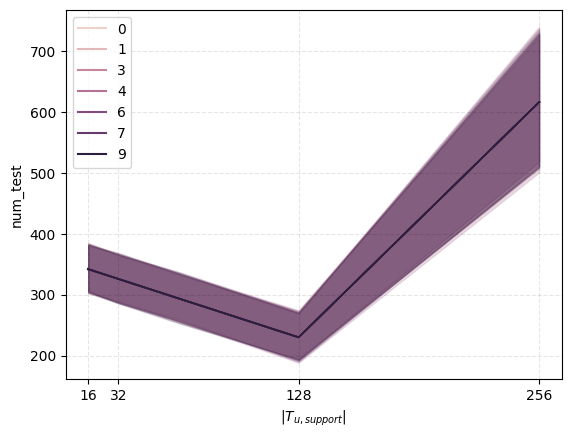

In [131]:
sns.scatterplot(model_metric_df.assign(num = np.log10(df.root_mean_squared_error)/),
            x = 'num_train', y = 'num_test',
            hue = 'seed')
plt.xlabel('$|T_{u, support}|$')
plt.xticks([16,32,128,256])
plt.grid(True, axis='y', color='black', alpha=0.1, linestyle='--')
plt.grid(True, axis='x', color='black', alpha=0.1, linestyle='--')
plt.legend(loc = 'upper left')

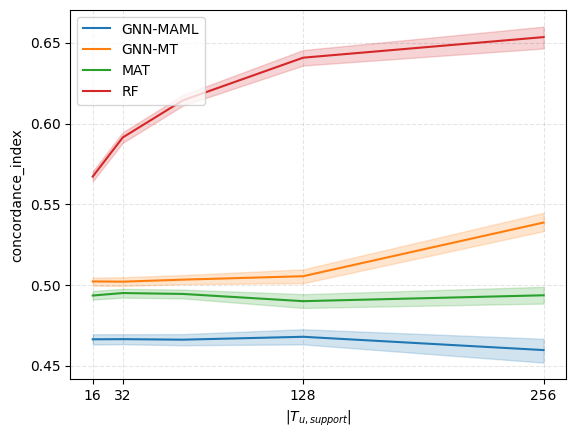

In [129]:
sns.lineplot(model_metric_df,#.assign(fixed_root_mean_squared_error = np.log10(df.root_mean_squared_error)/),
            x = 'num_train', y = 'concordance_index',
            hue = 'model')
plt.xlabel('$|T_{u, support}|$')
plt.xticks([16,32,128,256])
plt.grid(True, axis='y', color='black', alpha=0.1, linestyle='--')
plt.grid(True, axis='x', color='black', alpha=0.1, linestyle='--')
plt.legend(loc = 'upper left')

<Axes: xlabel='num_train', ylabel='mean_absolute_error'>

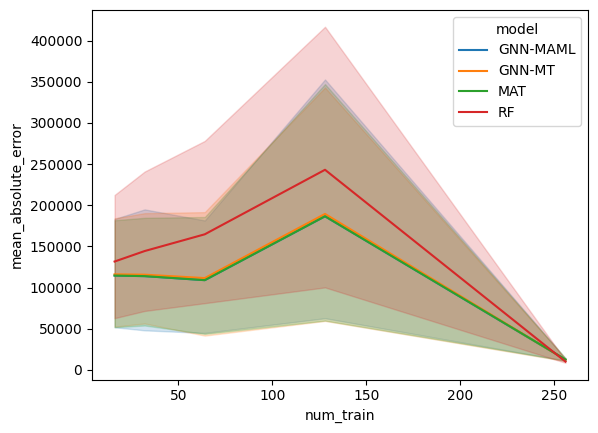

In [ ]:
sns.lineplot(model_metric_df,#.assign(fixed_root_mean_squared_error = np.log10(df.root_mean_squared_error)/),
            x = 'num_train', y = 'mean_absolute_error',
            hue = 'model')

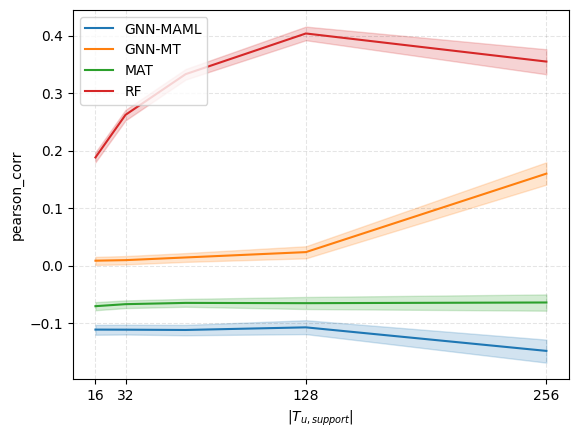

In [128]:
sns.lineplot(model_metric_df,#.assign(fixed_root_mean_squared_error = np.log10(df.root_mean_squared_error)/),
            x = 'num_train', y = 'pearson_corr',
            hue = 'model')
plt.xlabel('$|T_{u, support}|$')
plt.xticks([16,32,128,256])
plt.grid(True, axis='y', color='black', alpha=0.1, linestyle='--')
plt.grid(True, axis='x', color='black', alpha=0.1, linestyle='--')
plt.legend(loc = 'upper left')

In [76]:
nM_space = np.linspace(1, 10000, 1000)
# prcnt_space = np.linspace(, 200, 1000)

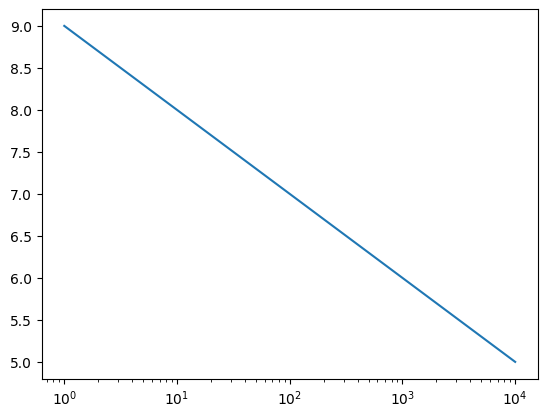

In [78]:
sns.lineplot(x = nM_space, y = 9-np.log10(nM_space))

plt.xscale('log')

In [152]:
query_str = ' and '.join([
        'model == "RF"',
        'seed == 3',
        'num_train_requested == 16',
        
        # 'num_train == 128',
        ])
data_df = model_metric_df.query(query_str)

In [153]:
data_df

,model,task,num_train_requested,num_train,fraction_positive_train,num_test,fraction_positive_test,seed,valid_score,mean_absolute_error,root_mean_squared_error,max_error,pearson_corr,concordance_index,spearman_corr,r_squared,kendall_tau
20133,RF,CHEMBL2219340,16,16,0.5000,141,0.489362,3,NaN,33.518369,39.937968,91.500,0.144916,0.575621,0.221278,-0.127256,0.151241
20173,RF,CHEMBL2219102,16,16,0.4375,141,0.446809,3,NaN,10.366028,16.793964,86.320,0.322193,0.592442,0.263205,-0.007410,0.184884
20213,RF,CHEMBL3707783,16,16,0.5000,146,0.500000,3,NaN,6112.005205,18242.772518,155850.070,0.622283,0.741871,0.670313,0.261290,0.483743
20253,RF,CHEMBL1243970,16,16,0.5000,192,0.500000,3,NaN,6455.145677,21849.403040,99743.270,0.209824,0.612411,0.328160,-0.071577,0.224821
20293,RF,CHEMBL1794504,16,16,0.5000,114,0.508772,3,NaN,13594.430860,15877.717121,63201.937,0.318973,0.622403,0.359557,0.084439,0.244806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26633,RF,CHEMBL2219059,16,16,0.5000,141,0.496454,3,NaN,23.541773,30.938522,109.070,0.309772,0.586827,0.254181,0.090014,0.173654
26673,RF,CHEMBL3706356,16,16,0.5000,277,0.498195,3,NaN,489.541733,1956.073463,24653.120,0.159743,0.669600,0.487891,-0.025712,0.339201
26723,RF,CHEMBL2219113,16,16,0.5000,141,0.496454,3,NaN,15.349007,23.123469,90.260,0.214887,0.533641,0.104787,-0.024636,0.067282
26763,RF,CHEMBL2219175,16,16,0.5000,141,0.468085,3,NaN,8.347447,13.809766,79.160,0.022767,0.506594,0.019853,-0.022752,0.013187


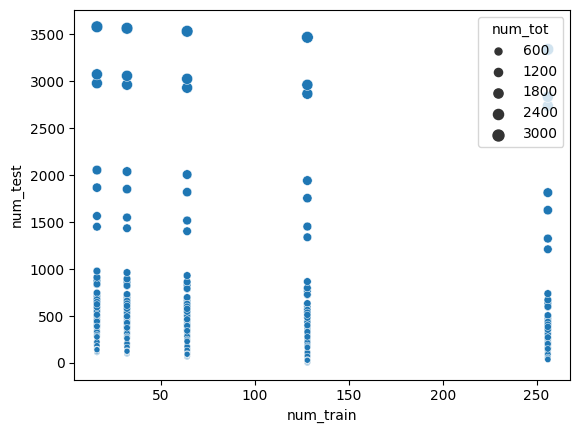

In [145]:

query_str = ' and '.join([
        'model == "RF"',
        'seed == 3',
        # 'num_train == 128',
        ])
data_df = model_metric_df.query(query_str)

g = sns.scatterplot(data_df.assign(num_tot = data_df['num_train'] + data_df['num_test']), 
        x = 'num_train', y = 'num_test',
        size='num_tot',
        # hue = 'model', #style = 'seed',
        )
# plt.title(task)
plt.show()

In [171]:
query_str = ' and '.join([
        'model == "RF"',
        'seed == 3',
        # 'num_train == 128',
        ])
tmp_df1 = model_predlabel_df.query(query_str)

tmp_df2 = model_metric_df.query(query_str)

In [172]:
tmp_df1 = tmp_df1.groupby(['model', 'task', 'num_train_requested', 'seed']).agg({'label': ('count', 'median', 'mean', 'skew')}).droplevel(0, axis=1,).reset_index()
tmp_df2 = tmp_df1.merge(tmp_df2, on = ['model', 'task', 'num_train_requested', 'seed'])


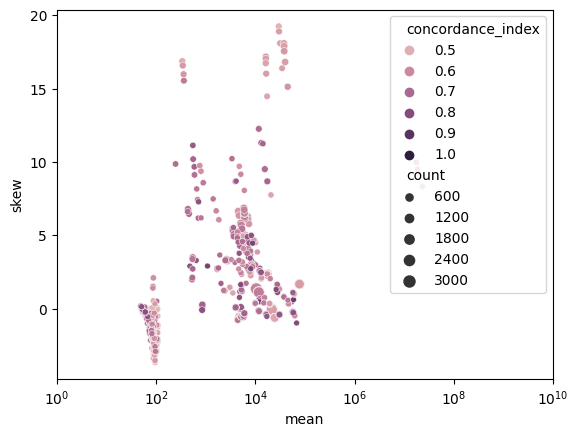

In [192]:

g = sns.scatterplot(
    tmp_df2,
    x = 'mean', y='skew',
    size='count', hue = 'concordance_index',
    )
plt.xlim(1,10000000000)
plt.xscale('log')
plt.show()

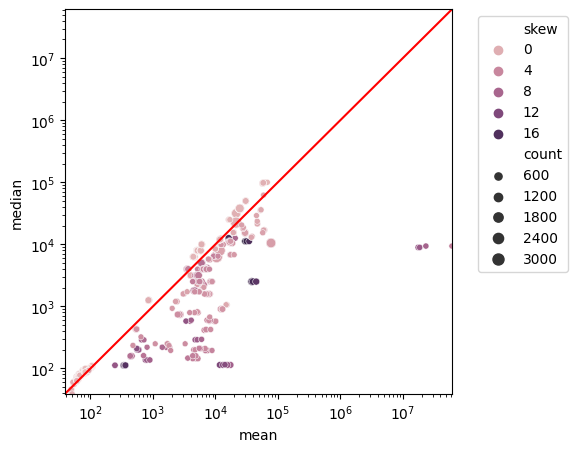

In [200]:
plt.figure(figsize=(5,5))
g = sns.scatterplot(
    tmp_df2,
    x = 'mean', y='median',
    size='count', hue = 'skew',
    )
add_abline(g)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
tasks = model_predlabel_df.task.unique().tolist()

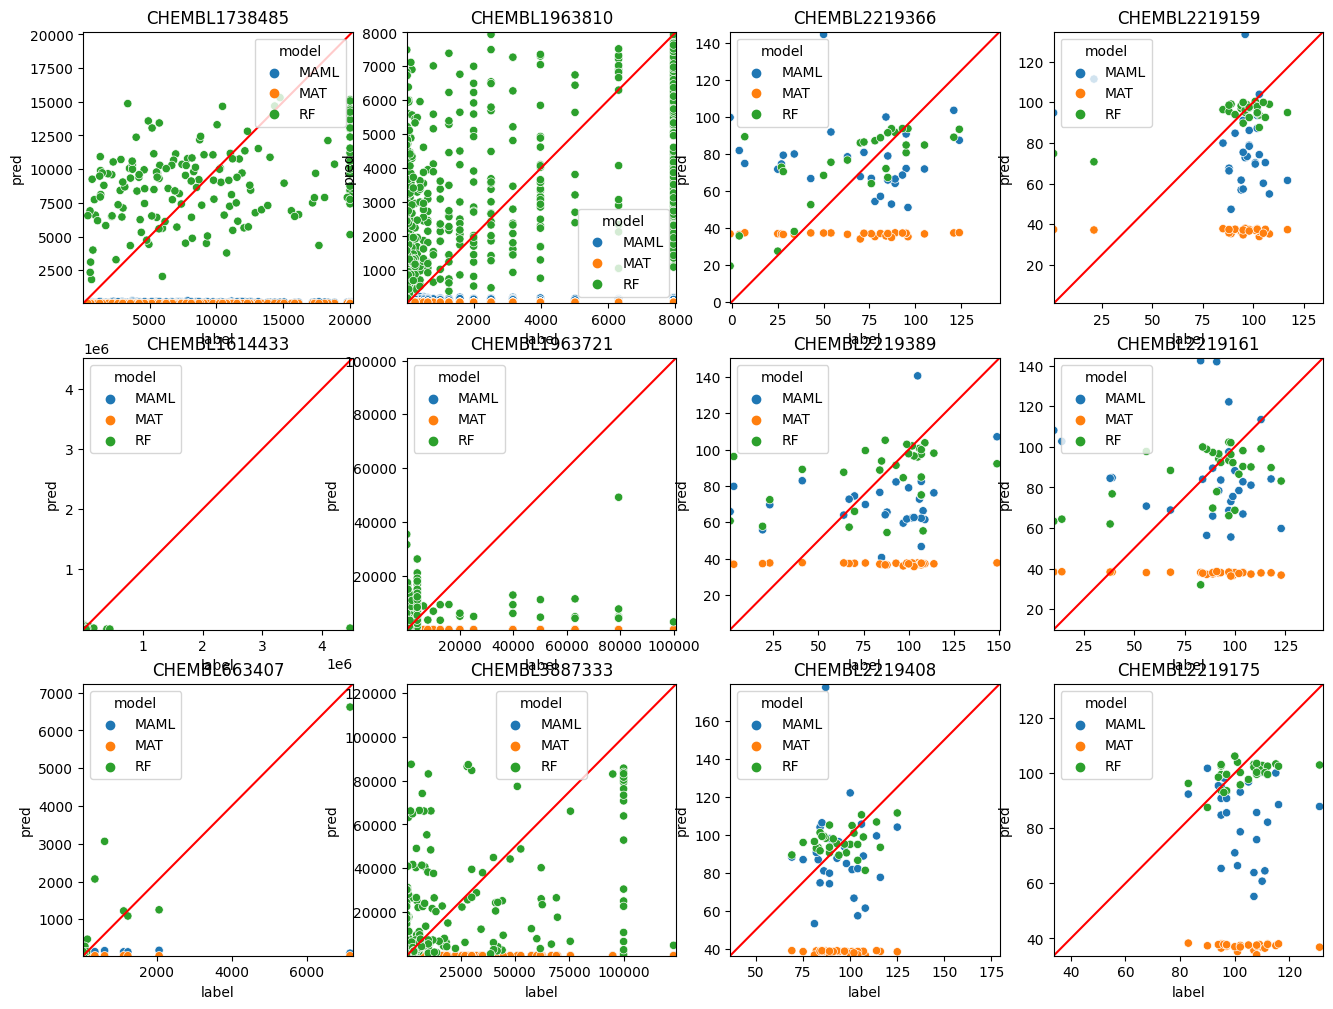

In [121]:
cnt1 = 0
cnt2 = 0
fig = plt.figure(figsize=(16, 12,))
axes = fig.subplots(ncols=4, nrows=3 )
axes1 = axes[:,0:2].reshape(-1)
axes2 = axes[:,2:4].reshape(-1)

for task in tasks:
    query_str = ' and '.join([
        # 'model != "RF"',
        f'task == "{task}"',
        'seed == 3',
        'num_train == 128',
        ])
    data_df = model_predlabel_df.query(query_str)
    if len(data_df) <= 30:
        continue
    
    if cnt1 >= 6 and cnt2 >= 6:
        break
    elif data_df.label.max() > 200 and cnt1 < 6:
        ax = axes1[cnt1]
        cnt1 += 1
    elif data_df.label.max() <= 200 and cnt2 < 6:
        ax = axes2[cnt2]
        cnt2 += 1
    else:
        continue
    
    g = sns.scatterplot(model_predlabel_df.query(query_str), 
        x = 'label', y = 'pred',
        hue = 'model', #size= 'num_train', #style = 'seed',
        ax=ax
        )
    add_abline(g)
    ax.set_title(task)
fig.show()

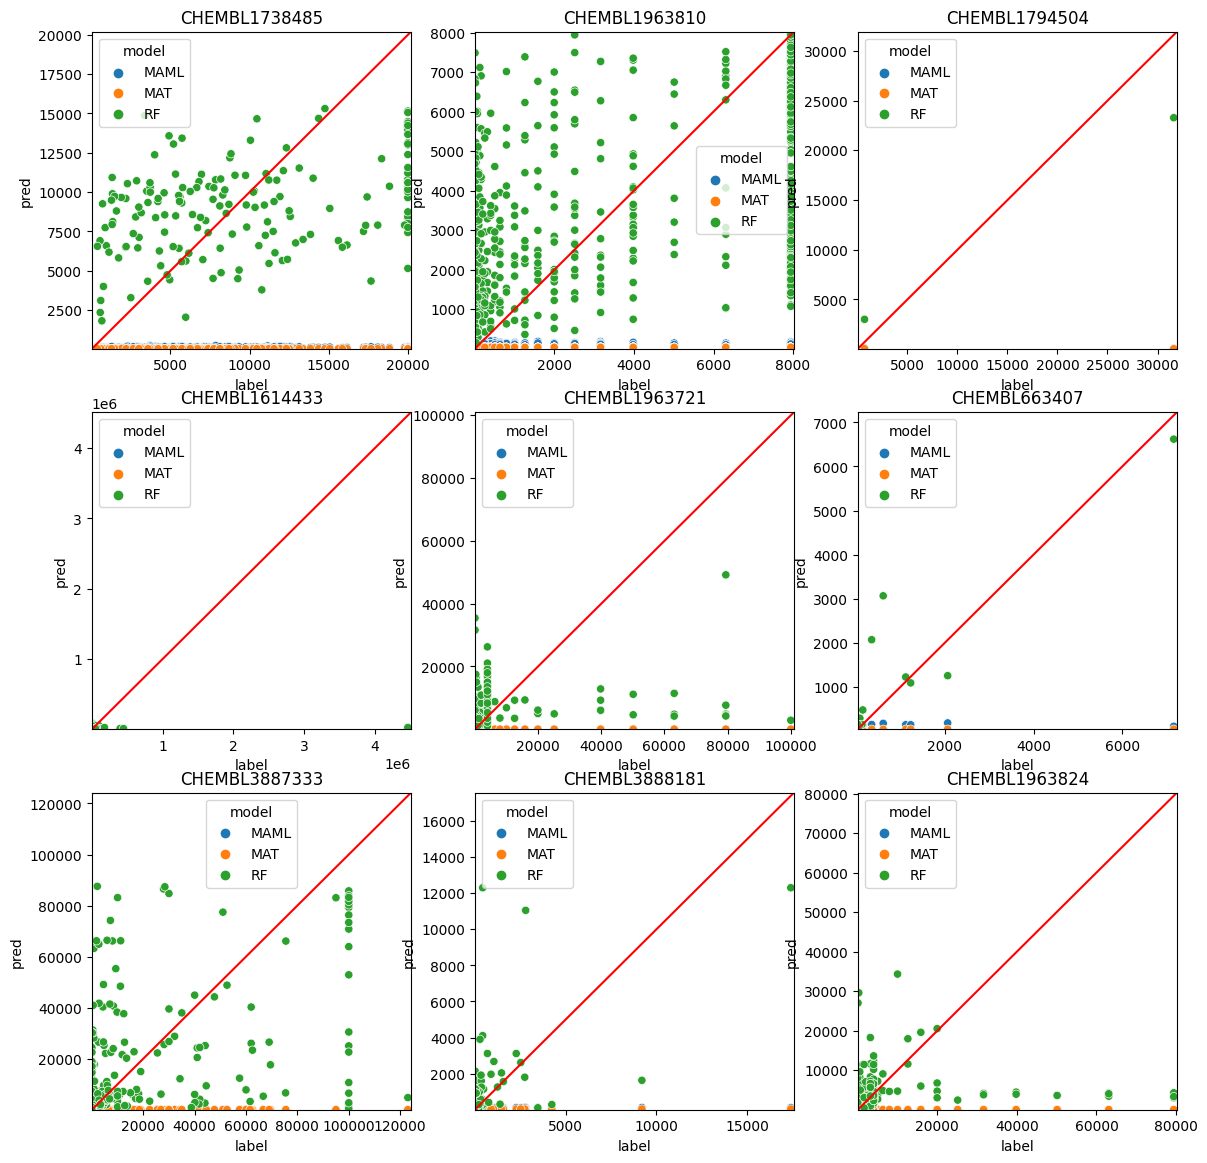

In [90]:
cnt = 0
fig = plt.figure(figsize=(14,14))
axes = fig.subplots(nrows=3, ncols=3)
for task in tasks:
    query_str = ' and '.join([
        # 'model != "RF"',
        f'task == "{task}"',
        'seed == 3',
        'num_train == 128',
        ])
    data_df = model_predlabel_df.query(query_str)
    if cnt > 8:
        break
    elif data_df.label.max() > 200:
        ax = fig.axes[cnt]
        cnt += 1
    else:
        continue
    
    g = sns.scatterplot(model_predlabel_df.query(query_str), 
        x = 'label', y = 'pred',
        hue = 'model', #size= 'num_train', #style = 'seed',
        ax=ax
        )
    add_abline(g)
    ax.set_title(task)
fig.show()

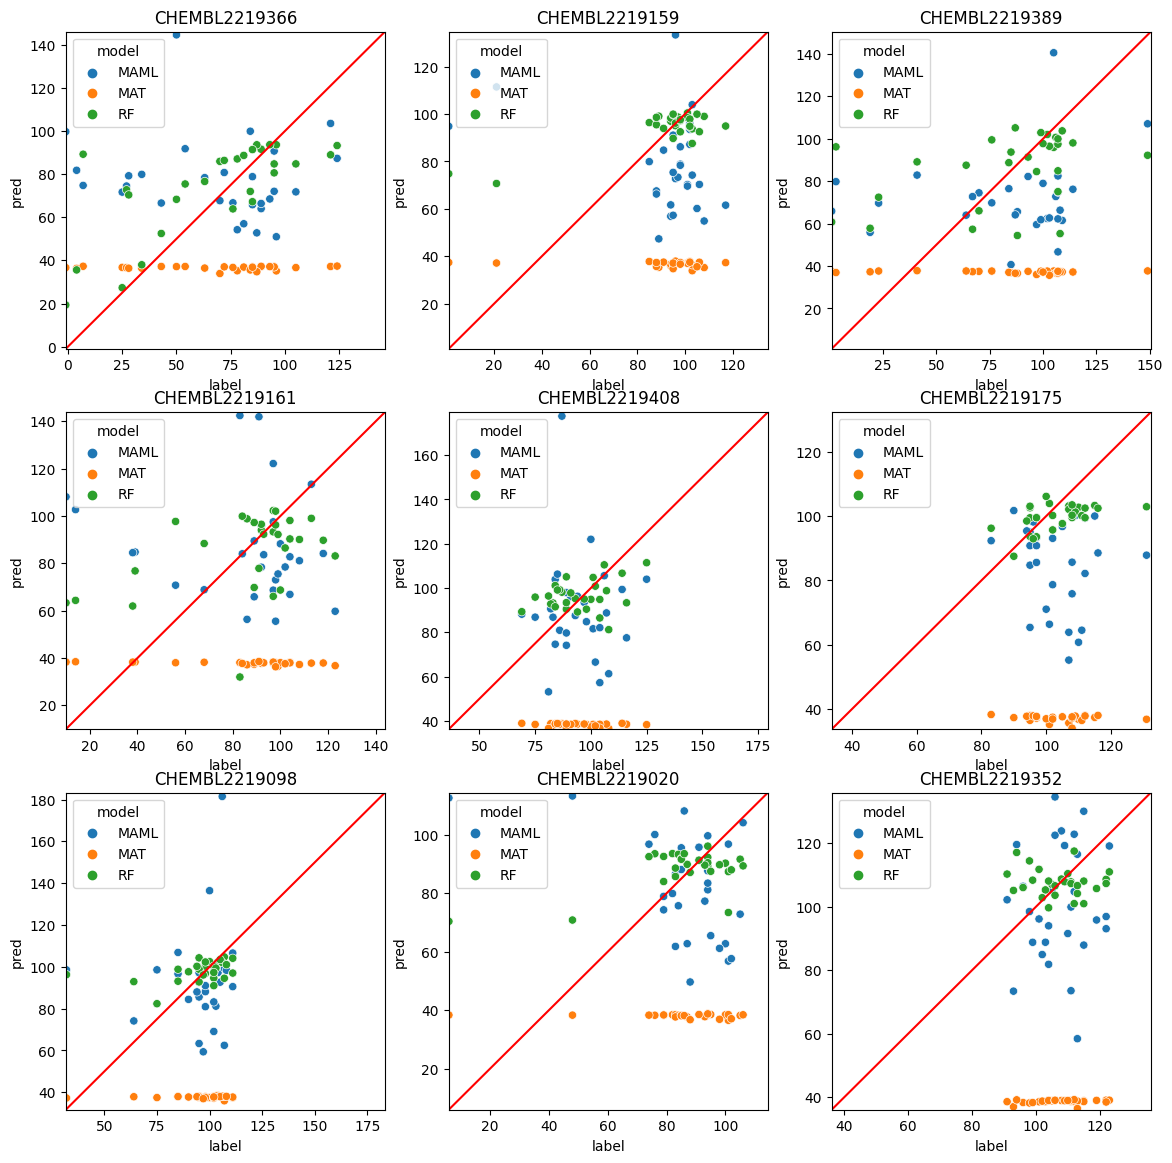

In [91]:
cnt = 0
fig = plt.figure(figsize=(14,14))
axes = fig.subplots(nrows=3, ncols=3)
for task in tasks:
    query_str = ' and '.join([
        # 'model != "RF"',
        f'task == "{task}"',
        'seed == 3',
        'num_train == 128',
        ])
    data_df = model_predlabel_df.query(query_str)
    if cnt > 8:
        break
    elif data_df.label.max() <= 200:
        ax = fig.axes[cnt]
        cnt += 1
    else:
        continue
    
    g = sns.scatterplot(model_predlabel_df.query(query_str), 
        x = 'label', y = 'pred',
        hue = 'model', #size= 'num_train', #style = 'seed',
        ax=ax
        )
    add_abline(g)
    ax.set_title(task)
fig.show()

In [1]:
from scipy.stats import (
    spearmanr,
    pearsonr,
    kendalltau
)
import numpy as np

a = [0.1, 0.2, .3 , .4, .5]
selected_idx = np.random.choice(len(a),3,replace = False)
a = np.random.permutation(a)
b = [3.4, 4.4, 4.5, 4.6, 4.7]
ci = (kendalltau(a,b).correlation+1)/2  # 'correlation' for scipy==1.7.3, but 'statistic' for scipy==1.10.1

from lifelines.utils import concordance_index

orig_ci = concordance_index(a,b)

print(f'orig_ci: {orig_ci}\nci: {ci}')

AttributeError: 'KendalltauResult' object has no attribute 'statistic'

In [1]:
import scipy
scipy.__version__

'1.10.1'

Bad pipe message: %s [b"\x07\x91\x0eN\xca\x9b\xc9\xe8\xedE\xcf\x8c\x1b\xbb\x0f\xcd\xc1f\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x03\x03\x02\x03\x03\x01\x02\x01\x03"]
Bad pipe message: %s [b'\x02']
Bad pipe message: %s [b'\x05\x02\x06']
Bad pipe message: %s [b"\xfd\xdb\x90\xa83\xf8\x0e\xde\x02\xe1e\x02\xe6\xe4\

In [39]:
np.array(a)[selected_idx]


array([0.2, 0.5, 0.4])

In [2]:
kendalltau(a,b)

KendalltauResult(correlation=0.19999999999999998, pvalue=0.8166666666666667)

In [15]:
spearmanr(a,b).statistic

0.9486832980505139

0.9166666666666666